<a href="https://colab.research.google.com/github/frogi16/MLP-learning-visualiser/blob/main/RedWineClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying wines from public dataset

## Preparations

In [1]:
import warnings

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import copy
import numpy as np
import pandas as pd
import math

**Data will be read from given link**

In [2]:
#columns:
#    "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
#    "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
#    "pH", "sulphates", "alcohol", "quality"

data = pd.read_csv (r'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

y = pd.DataFrame(data, columns= ['quality']).values.ravel()
X = pd.DataFrame(data)
X = X.drop(columns='quality')

Prepare input

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Training

In [4]:
mlp = MLPClassifier(hidden_layer_sizes=(11, 50, 50), max_iter=50, alpha=1e-4,
                    solver='sgd', verbose=True, random_state=10,
                    learning_rate_init=.14, early_stopping=False,
                    n_iter_no_change = 5, warm_start = True)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")
    mlp.partial_fit(X_train, y_train, np.unique(y_train))

Iteration 1, loss = 1.34803647


In [5]:
#number of neurons on last layer
len(np.unique(y_train))

6

In [6]:
train_scores = []
test_scores = []
predictions = []
biases = []
coefs = []

Step by 1 iteration 40 times and save weights in betweens

In [7]:
for i in range(40):
  mlp.partial_fit(X_train, y_train)
  train_scores.append(mlp.score(X_train, y_train))
  test_scores.append(mlp.score(X_test, y_test))
  coefs.append(copy.deepcopy(mlp.coefs_))
  biases.append(copy.deepcopy(mlp.intercepts_))
  predictions.append(mlp.predict(X_test))
  #print("Training set score: %f" % train_scores[-1])
  #print("Test set score: %f" % test_scores[-1])



#print(confusion_matrix(y_test,predictions))
#print(classification_report(y_test,predictions))

#plt.plot(mlp.validation_scores_)

#for coeff_map in mlp.coefs_:
#  print("-------------------")
#  for coeff in coeff_map:
#    print("---" + str(coeff))

Iteration 2, loss = 1.13276260
Iteration 3, loss = 1.05426415
Iteration 4, loss = 1.00919669
Iteration 5, loss = 0.97766089
Iteration 6, loss = 0.95813043
Iteration 7, loss = 0.94436083
Iteration 8, loss = 0.93433251
Iteration 9, loss = 0.92580490
Iteration 10, loss = 0.91765275
Iteration 11, loss = 0.90903523
Iteration 12, loss = 0.90078431
Iteration 13, loss = 0.89258557
Iteration 14, loss = 0.88432377
Iteration 15, loss = 0.87536546
Iteration 16, loss = 0.86790763
Iteration 17, loss = 0.85968146
Iteration 18, loss = 0.85136054
Iteration 19, loss = 0.84350076
Iteration 20, loss = 0.83431299
Iteration 21, loss = 0.82525138
Iteration 22, loss = 0.81610485
Iteration 23, loss = 0.80783539
Iteration 24, loss = 0.79845530
Iteration 25, loss = 0.78865543
Iteration 26, loss = 0.77907687
Iteration 27, loss = 0.76856556
Iteration 28, loss = 0.75954493
Iteration 29, loss = 0.75107954
Iteration 30, loss = 0.74273012
Iteration 31, loss = 0.73547915
Iteration 32, loss = 0.72817187
Iteration 33, lo

# Visualisations

## Standard

In [ ]:
plt.plot(mlp.loss_curve_, label='loss curve')
plt.plot(train_scores, label='score training')
plt.plot(test_scores, label='score test')
plt.legend()

In [9]:
print("biases")
print("size:\t", len(biases[0]))
for i in range(len(coefs[0])):
  print("\tsize:\t", len(coefs[0][i]))
print()
print("coefs")
print("size:\t", len(coefs[0]))
for i in range(len(coefs[0])):
  print("\tsize:\t", len(coefs[0][i]), "x", len(coefs[0][i][0]))

biases
size:	 4
	size:	 11
	size:	 11
	size:	 50
	size:	 50

coefs
size:	 4
	size:	 11 x 11
	size:	 11 x 50
	size:	 50 x 50
	size:	 50 x 6


In [ ]:
biases_0 = [biases[i][0] for i in range(len(biases))]
plt.plot(biases_0)

In [ ]:
biases_1 = [biases[i][1] for i in range(len(biases))]
plt.plot(biases_1)

In [ ]:
weights = [coefs[i][0][0] for i in range(len(coefs))]
plt.plot(weights)

## Custom

In [13]:
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from matplotlib import animation

In [74]:
def figsize_from_data(z):
  expected_max_l = 10
  yl, xl = np.shape(z)
  scale_coef = max(xl, yl) / expected_max_l
  xls, yls = xl // scale_coef, yl // scale_coef

  #lines below transform squares to rects, not the best option
  if xls/yls > 5:
    yls *= 2
  elif yls/xls > 5:
    xls *= 2
  
  return (xls, yls)


def plot_layer_2D(z):
  fig = plt.figure()

  plt.title("Wagi połączeń")
  plt.xlabel('Neuron wyjściowy')
  plt.ylabel('Neuron wejściowy')

  plt.imshow(z)
  plt.colorbar()
  
  plt.show()


def plot_layer(z):
    # Because of high peaks color mapping is not very useful fot smaller
    # values. Points with execution time > vmax will all be colored with the
    # same color.    
    fig = plt.figure(figsize = figsize_from_data(z))
    ax = fig.gca(projection='3d')
    
    ax.set_title("Wagi połączeń")
    
    ax.set_ylabel("Neuron wejściowy")
    ax.yaxis.set_ticks_position("bottom")
    ax.yaxis.set_label_position("bottom")
    
    ax.set_xlabel("Neuron wyjściowy")
    ax.xaxis.set_ticks_position("bottom")
    ax.xaxis.set_label_position("bottom")

    x, y = np.meshgrid(range(1, len(z[0]) + 1), range(1, len(z) + 1))
    z = np.array(z)

    surf = ax.plot_surface(x, y, z, cmap='viridis')

    ax.azim = -90
    ax.elev = 90
    ax.get_zaxis().set_ticks([])

    # Masking values exceeding threshold allows colorbar to mimic mapping
    # looking exactly like used above.
    mapping = cm.ScalarMappable(cmap=surf.cmap)   
    mapping.set_array(z)

    # Around the height of the surface plot.
    fig.colorbar(mapping, fraction=0.046, pad=0.04)

    plt.show()

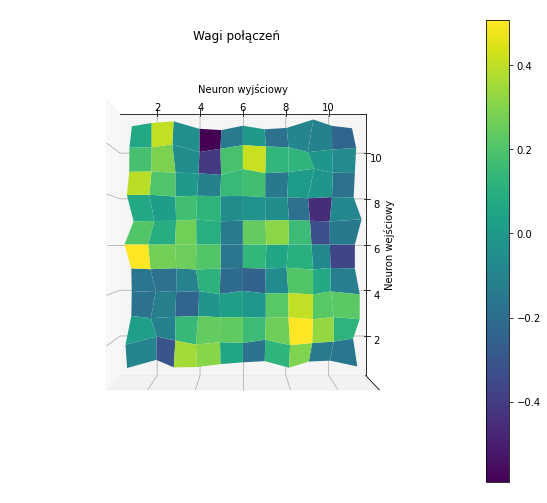

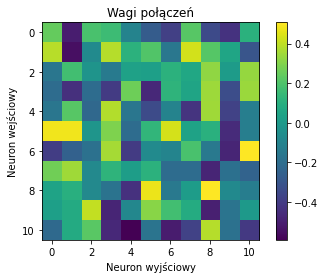

In [75]:
plot_layer(coefs[0][0])
plot_layer_2D(coefs[0][0])

In [16]:
from matplotlib import rc
rc('animation', html='jshtml')

import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

def animate_layer_no(n_layer):
  z = np.zeros_like(coefs[0][n_layer])
  yl, xl = np.shape(z)
  x, y = np.meshgrid(range(1, xl + 1), range(1, yl + 1))
  print(np.shape(z))

  fig = plt.figure(figsize=figsize_from_data(z), frameon=False)

  ax = fig.gca(projection='3d', proj_type = 'ortho')
  surf = ax.plot_surface(x, y, z, cmap='bwr')
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

  
  cbaxes = fig.add_axes([0.85, 0.35, 0.05, 0.3])
  mapping = cm.ScalarMappable(cmap=surf.cmap)
  mapping.set_array([-1, 1])
  cb = plt.colorbar(mapping, fraction=0.026, pad=0.001, cax=cbaxes)

  def init():
      return surf,

  def animate(i):
      print('\r', 'Frame ', i, end='')
      z = np.array(coefs[i][n_layer])
      ax.clear()
      ax.azim = -90
      ax.elev = 90
      ax.get_zaxis().set_ticks([])
      ax.set_title(f"Wagi połączeń na warstwie {n_layer}")
  
      ax.set_ylabel("Neuron wejściowy")
      ax.set_ylim3d(1, yl)
      ax.yaxis._axinfo['juggled'] = (-1,1,1)

      ax.set_xlabel("\n\nNeuron wyjściowy")
      ax.set_xlim3d(1, xl)
      ax.xaxis._axinfo['juggled'] = (-1,0,0)

      surf = ax.plot_surface(x, y, z, cmap='bwr')
      return surf,

  anim = animation.FuncAnimation(fig, animate, init_func=init,
                                frames=len(coefs), interval=100, blit=True)

  return anim

(11, 11)
 Frame  39

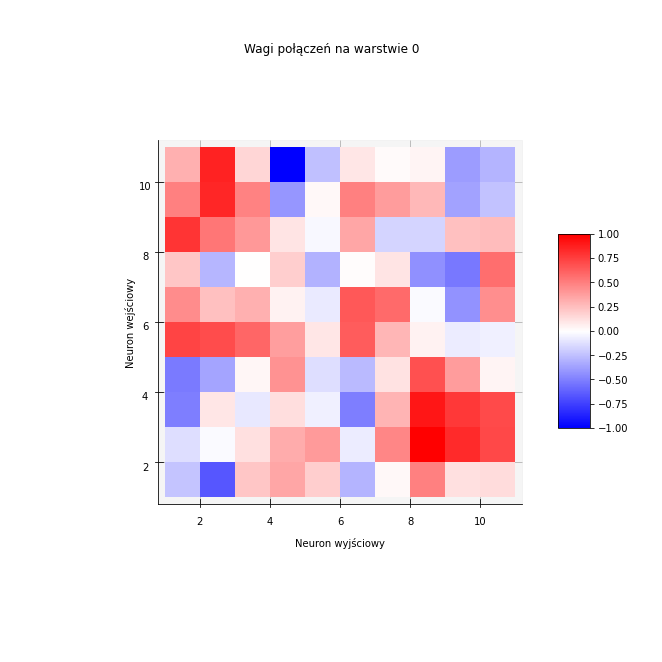

In [17]:
anim = animate_layer_no(0)
anim